Disclaimer: This document is a Colab Python file, created during one of the Supervised Learning lectures given by Professor Christian Calvo Masis. Therefore, all the credits for this Colab should be attributed to him.

In [4]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

In [5]:

# cargar datos
iris = load_iris()

#preparar pd de pandas para visualizar
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [6]:
#Ver datos ejemplo
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
5,5.4,3.9,1.7,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
121,5.6,2.8,4.9,2.0,virginica
26,5.0,3.4,1.6,0.4,setosa
145,6.7,3.0,5.2,2.3,virginica
32,5.2,4.1,1.5,0.1,setosa
120,6.9,3.2,5.7,2.3,virginica
82,5.8,2.7,3.9,1.2,versicolor
112,6.8,3.0,5.5,2.1,virginica
10,5.4,3.7,1.5,0.2,setosa


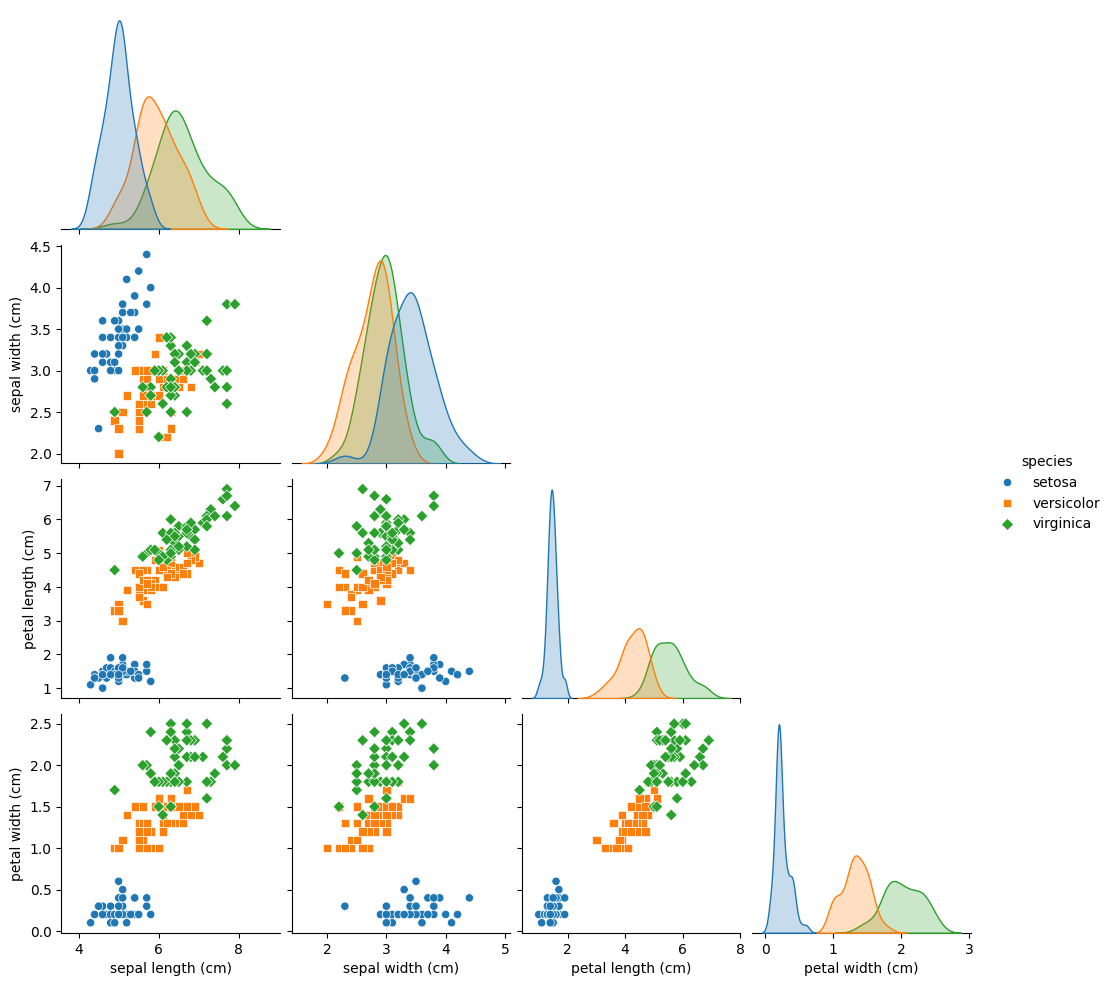

In [7]:
# Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], corner=True)
plt.show()

#Petal Length vs. Petal Width:

**Setosa**: Forma un cluster con pétalos más cortos y angostos.

**Versicolor**: Largo y ancho de pétalos es intermedio, tiene algún traslape con Virginica.

**Virginica**: Generalmente tiene pétalos más largos y anchos. Forma un cluster un poco distinto que la Versicolor.


#Sepal Length vs. Sepal Width:

**Setosa**: Forma un grupo con sépalos más anchos que largos, se distinque de los otros dos tipos.

**Versicolor and Virginica**: Tienen un traslape con largos similares de sépalo, es difícil diferenciarlas solo por esto aunque la Virginica tiene los más largos.

#Sepal Length vs. Petal Length:

La setosa se separa claramente dado los pétalos más cortos.
Hay una transición gradual de Setosa a Versicolor y a Virgínica.

# Sepal Width vs Petal Width:

La Setosa forma un cluster separado con pétalos más angostos.

La Versicolor y la Virginica tienen mayor traslape, pero la Virginica muestra los pétalos más anchos en promedio.


In [8]:
#preparar datos para el modelo
X, y = iris.data, iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [10]:

# Entrenar el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

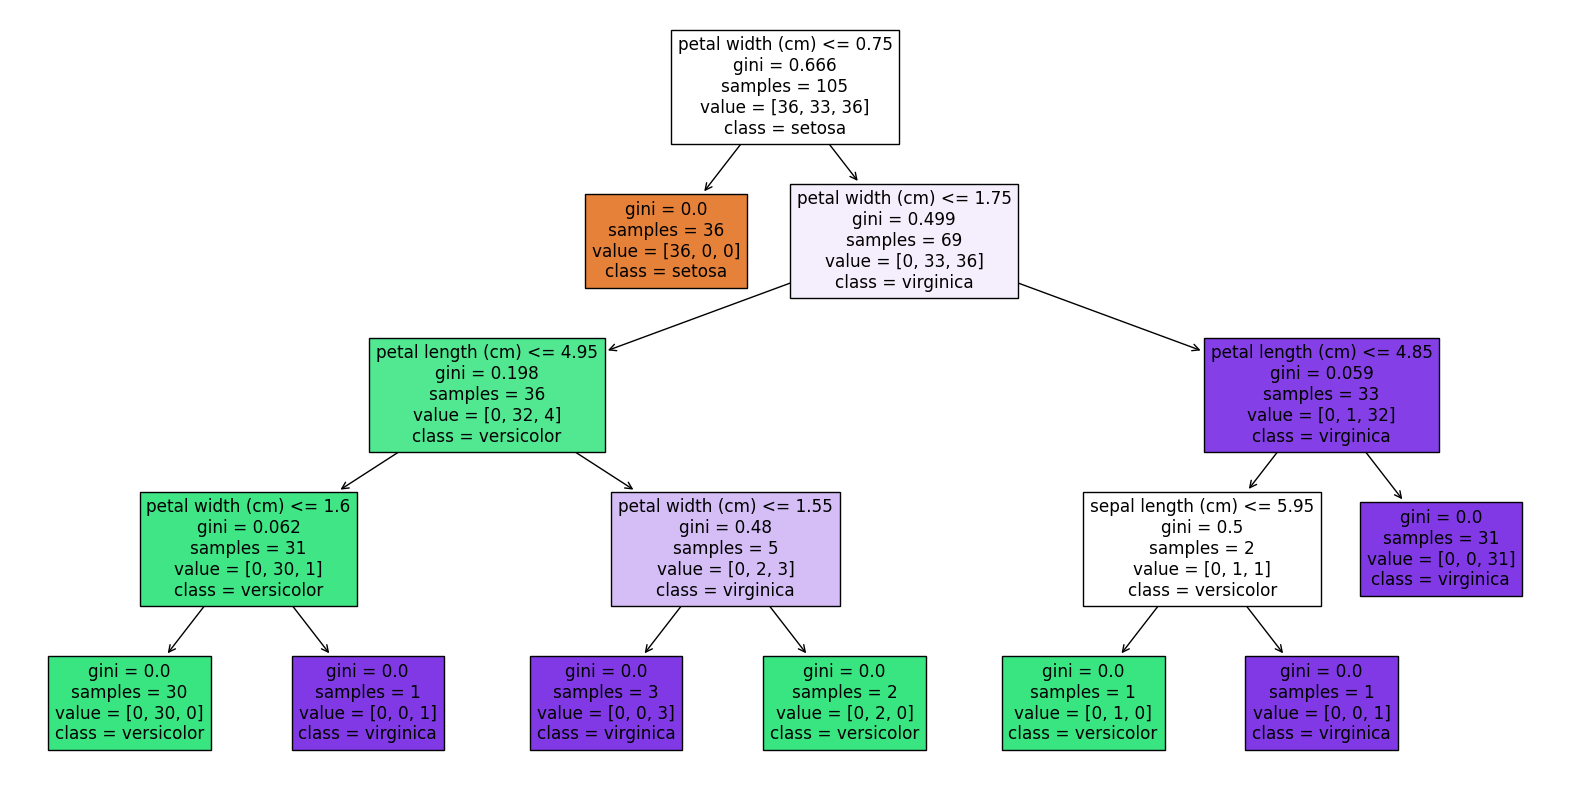

In [11]:

# Visualizar el arbol
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

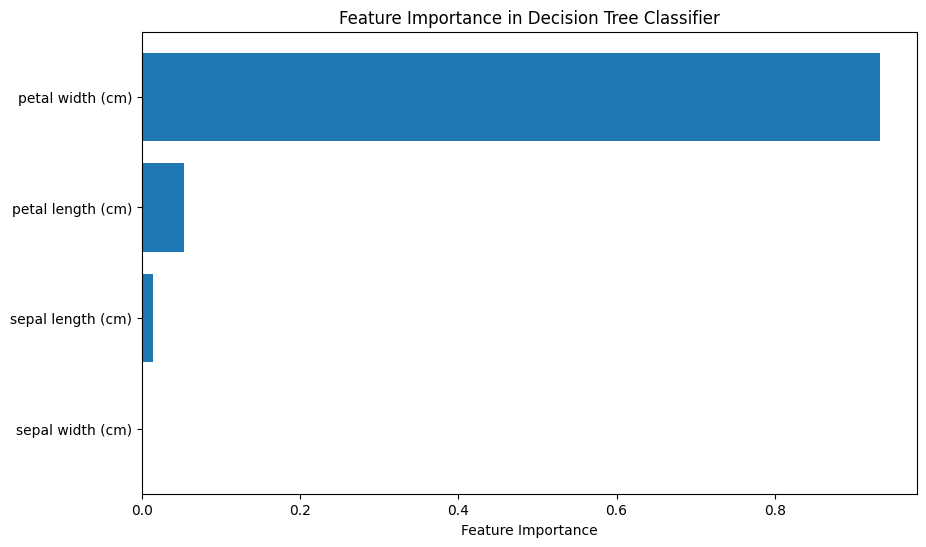

             Feature  Importance
3   petal width (cm)    0.932588
2  petal length (cm)    0.053115
0  sepal length (cm)    0.014297
1   sepal width (cm)    0.000000


In [12]:
# Obener la importancia de las características
feature_importances = clf.feature_importances_
feature_names = iris.feature_names

# Crear un DF
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar los features
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), importance_df['Importance'], align='center')
plt.yticks(np.arange(len(feature_names)), importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Print feature importances
print(importance_df)

In [13]:
#generar predicciones
y_pred = clf.predict(X_test)

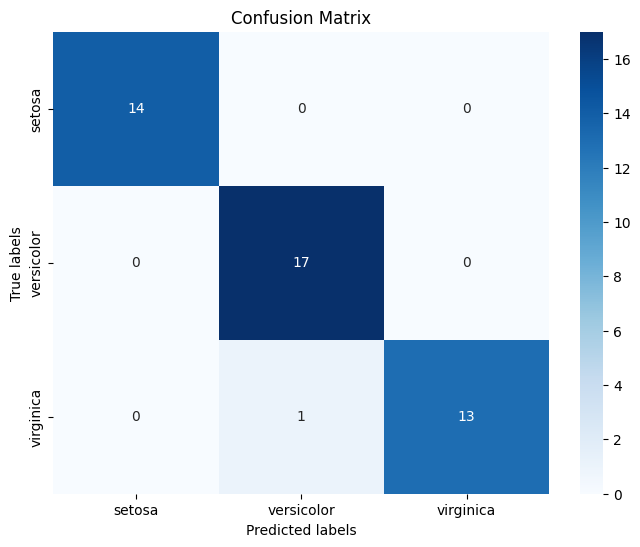

Classification Report test:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
#ahora generar la matriz de confusion.
from sklearn.metrics import confusion_matrix, classification_report

# Obtener la matriz
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Reporte de desempeño
print("Classification Report test:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Otra manera de hacerlo usando bibliotecas

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.98


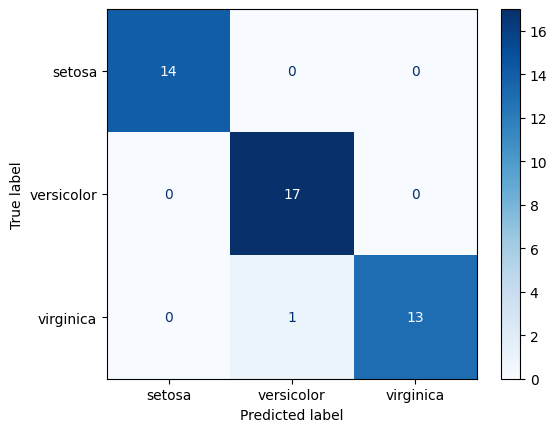

In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Implementación de Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Crear y entrenar modelo
model = RandomForestClassifier(n_estimators=25, random_state=10)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


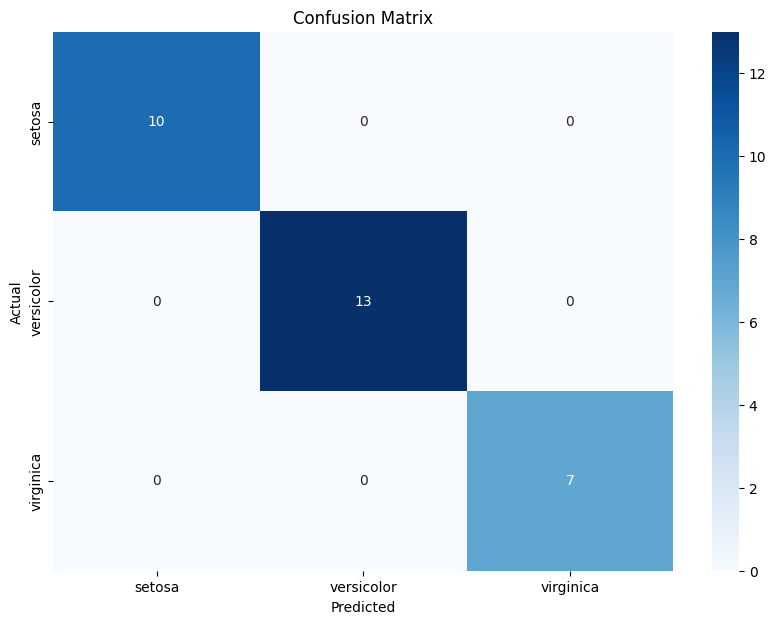

Feature Importances:
                   importance
petal width (cm)     0.489353
petal length (cm)    0.446271
sepal length (cm)    0.050362
sepal width (cm)     0.014014


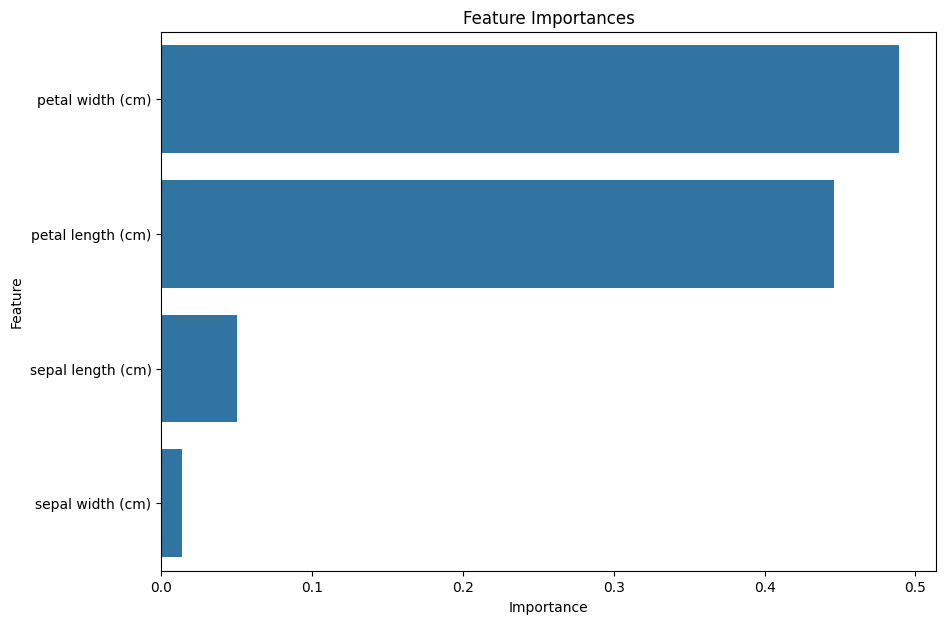

In [18]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Importancia de las características
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=iris.feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Visualización

In [19]:
!pip install graphviz
!pip install pydotplus

In [20]:
#visualizar los árboles

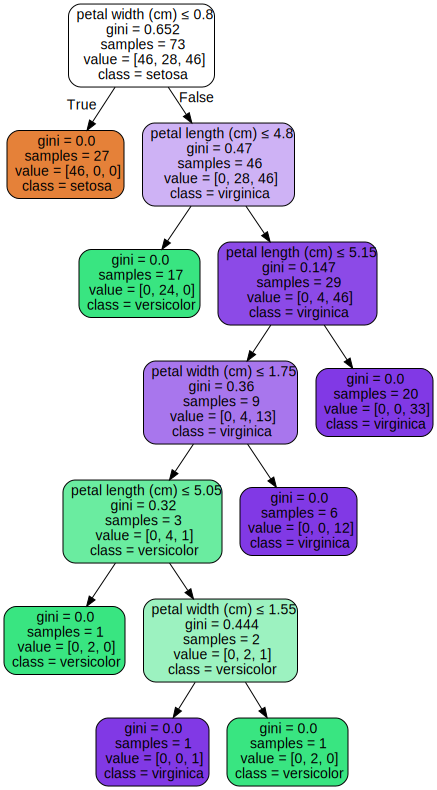

In [21]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz
import random

# Seleccionar uno de los árboles del Random Forest
estimator = model.estimators_[0]

# Exportar el árbol a un archivo DOT
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Utilizar pydotplus para convertir el archivo DOT en una imagen
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Mostrar el gráfico
graphviz.Source(dot_data)

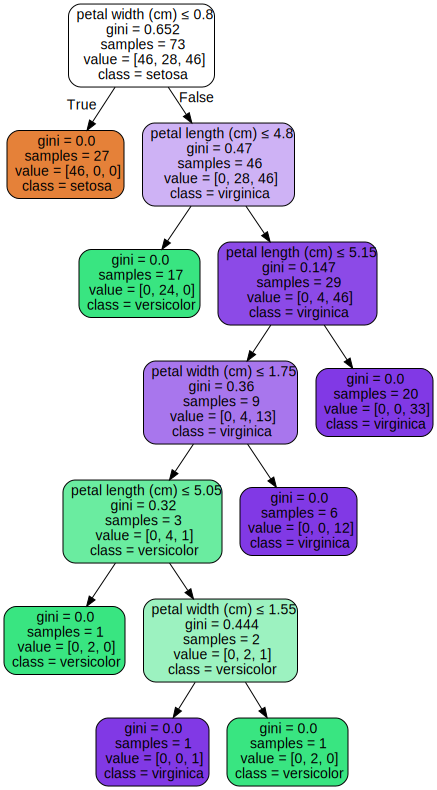

**************************************************


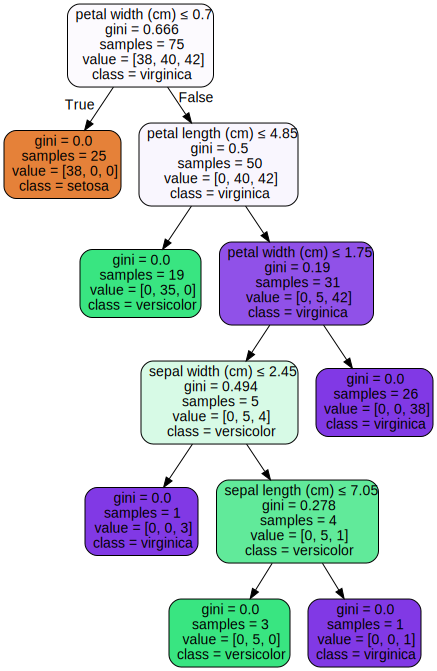

**************************************************


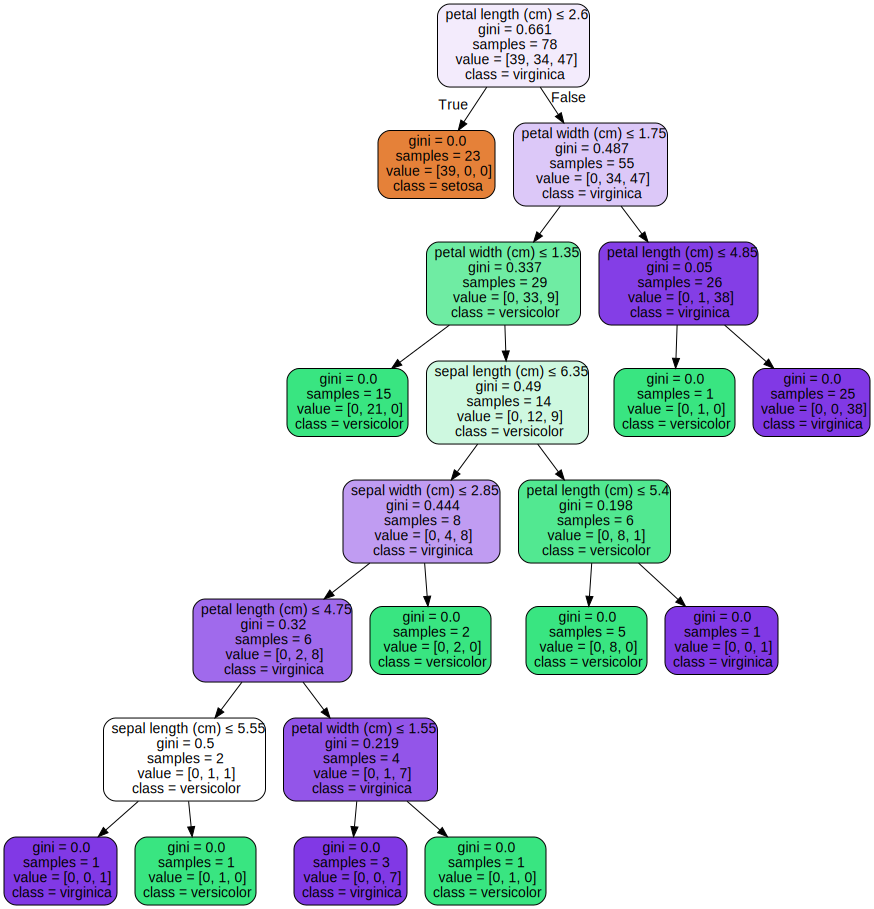

**************************************************


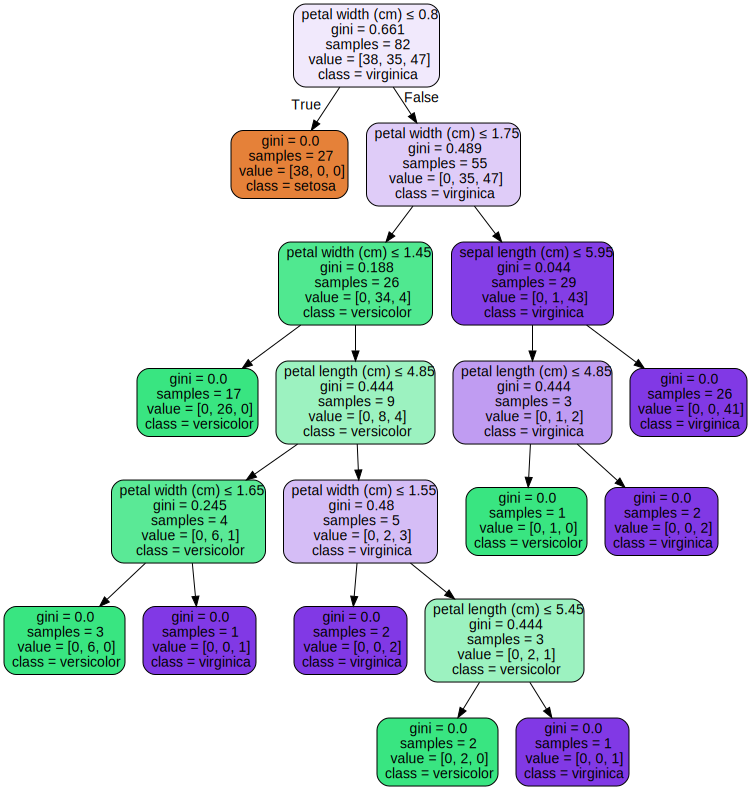

**************************************************


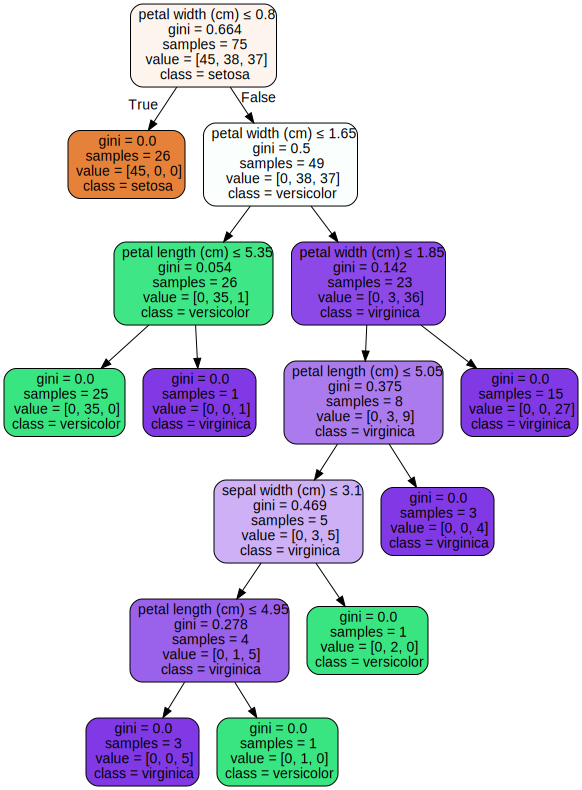

**************************************************


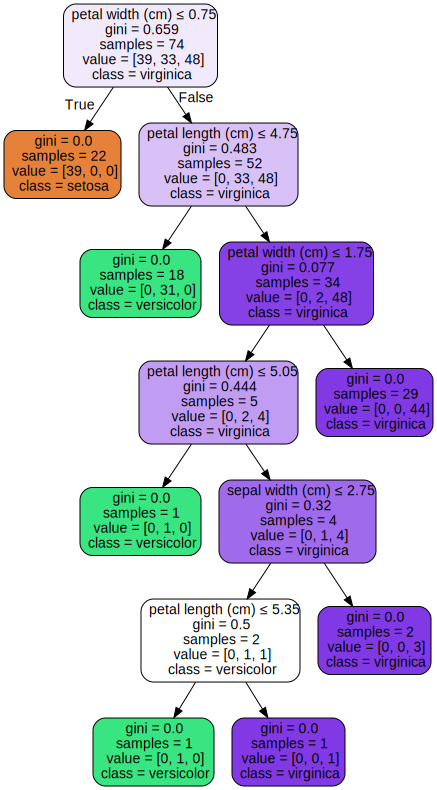

**************************************************


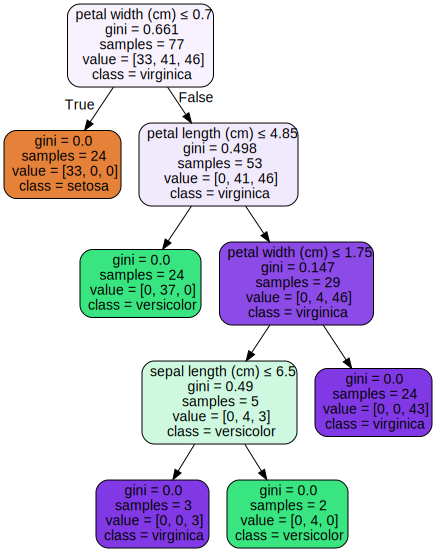

**************************************************


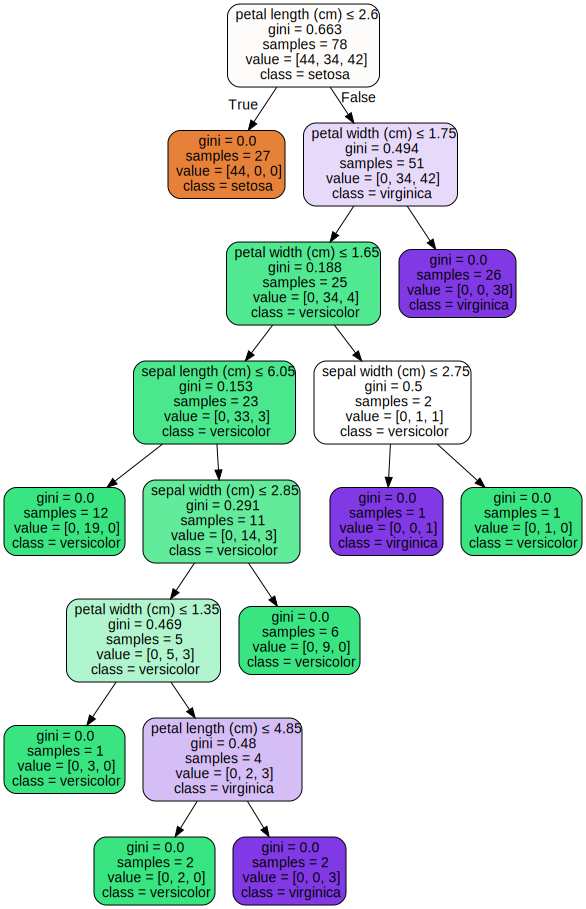

**************************************************


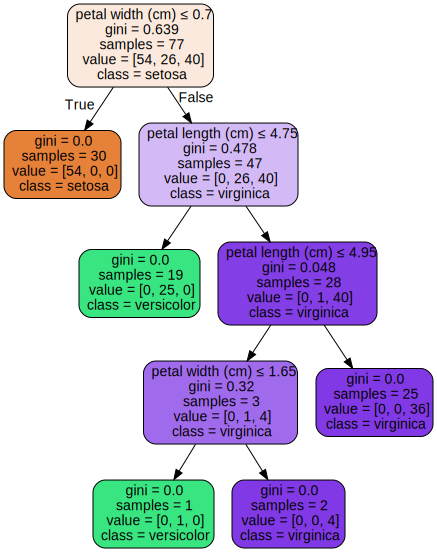

**************************************************


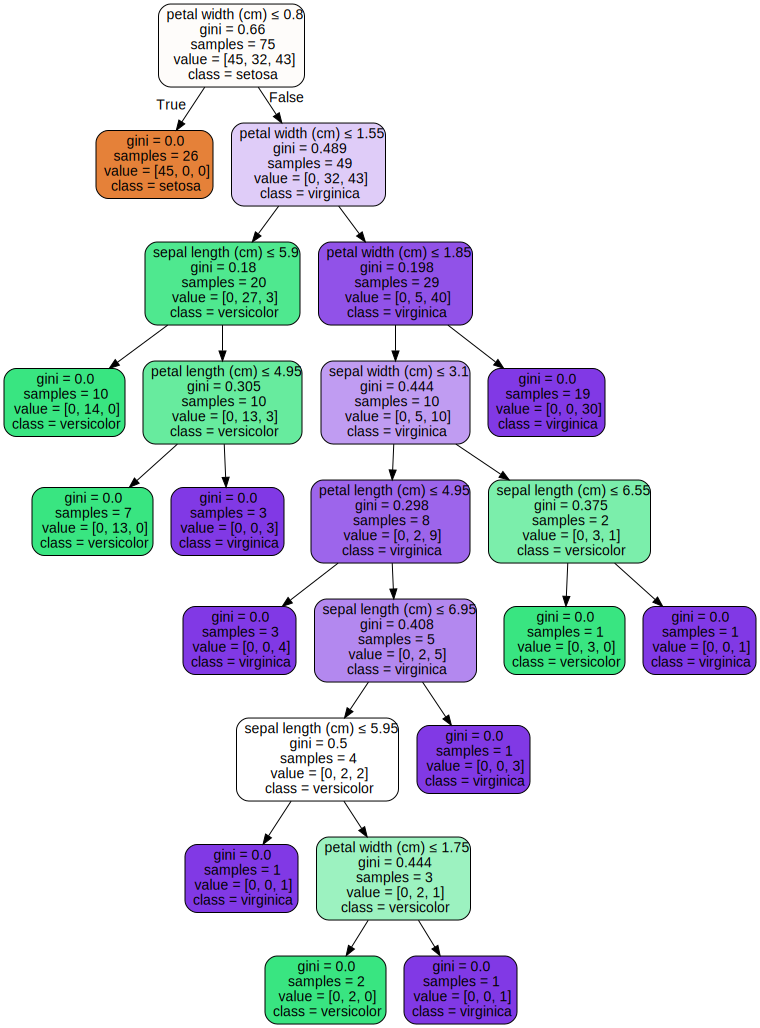

**************************************************


In [22]:
#desplegar 10 arboles aleatorios
from graphviz import Source

# Mostrar los 10 árboles utilizando Graphviz
#for i in range(10):
# Seleccionar 10 árboles aleatorios del Random Forest
random_trees = random.sample(model.estimators_, 10)

# Visualizar los 10 árboles seleccionados
for i, estimator in enumerate(random_trees):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    print("*" * 50)

#Adaboost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear y entrenar el modelo AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=10)
adaboost_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = adaboost_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo AdaBoost:", accuracy)

Precisión del modelo AdaBoost: 0.9777777777777777


Confusion Matrix:
[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


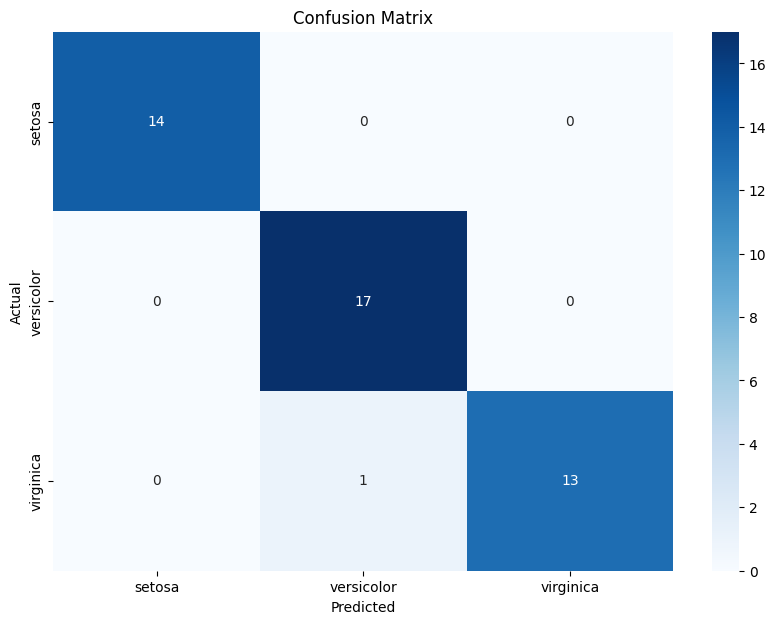

Feature Importances:
                   importance
petal width (cm)         0.56
petal length (cm)        0.44
sepal length (cm)        0.00
sepal width (cm)         0.00


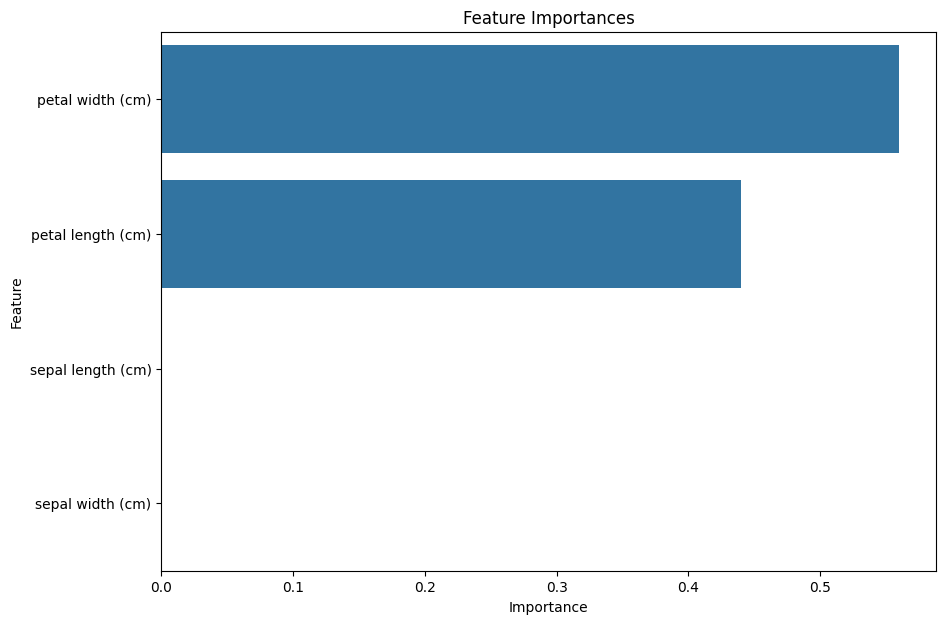

In [24]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Importancia de las características
feature_importances = pd.DataFrame(adaboost_model.feature_importances_,
                                   index=iris.feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Como evoluciona el modelo

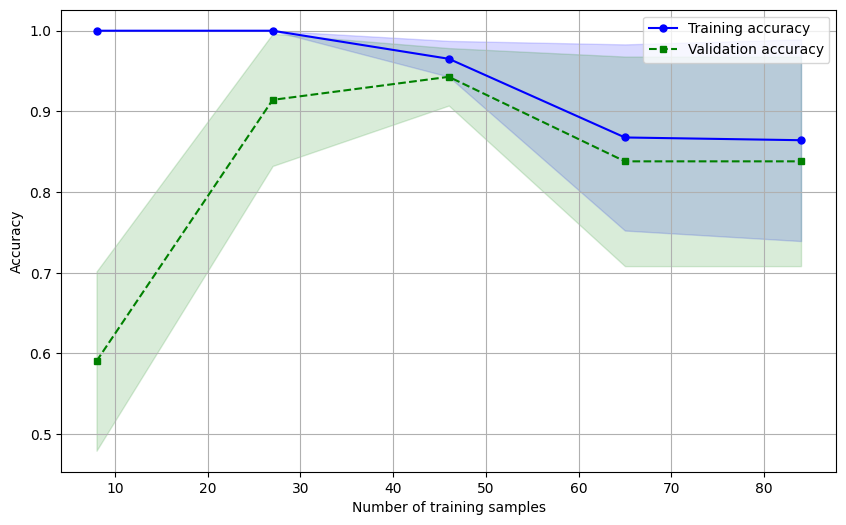

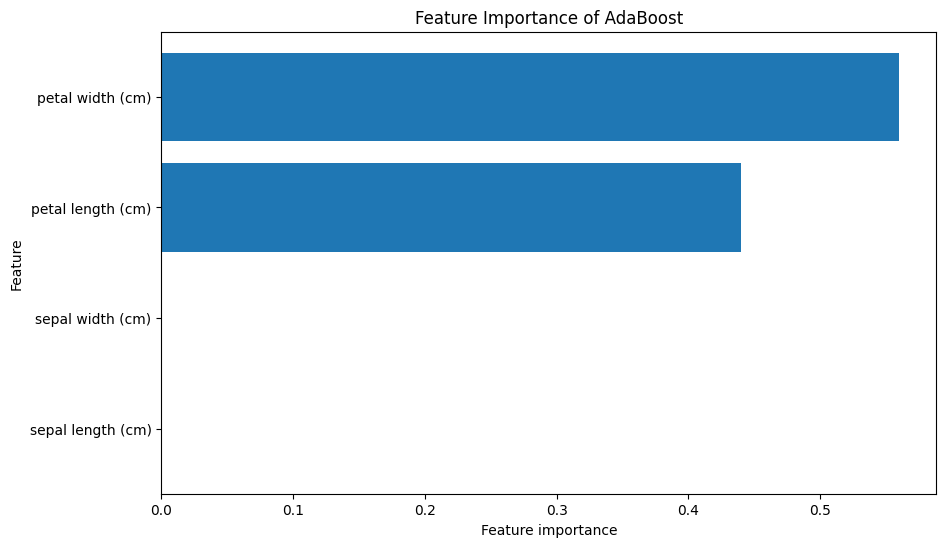

In [25]:
from sklearn.model_selection import learning_curve

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear y entrenar el modelo AdaBoost
#adaboost_model = AdaBoostClassifier(n_estimators=40, random_state=10)
#adaboost_model.fit(X_train, y_train)

# Visualizar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(adaboost_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualizar la importancia de las características
feature_importance = adaboost_model.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature Importance of AdaBoost')
plt.show()


# Gradient Boosting

Precisión del modelo Gradient Boosting: 0.9777777777777777

Reporte de clasificación para Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



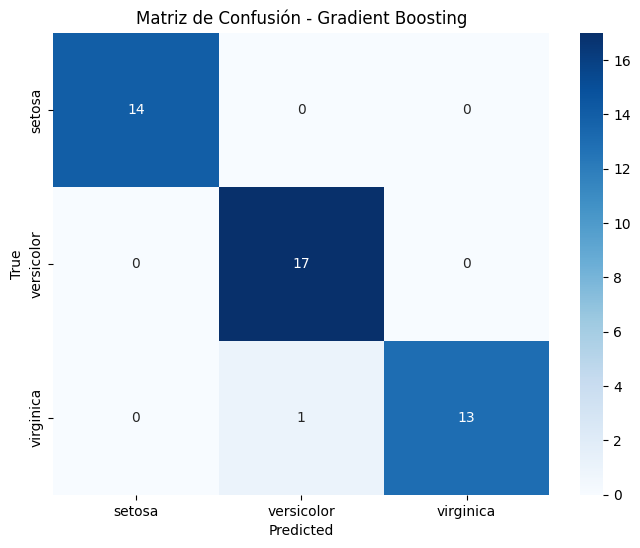

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear y entrenar el modelo Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=0)
gbm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gbm = gbm_model.predict(X_test)

# Evaluar el desempeño
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Precisión del modelo Gradient Boosting: {accuracy_gbm}")
print("\nReporte de clasificación para Gradient Boosting:\n", classification_report(y_test, y_pred_gbm))

# Matriz de confusión
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()

#XGBoost

Precisión del modelo XGBoost: 1.0

Reporte de clasificación para XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



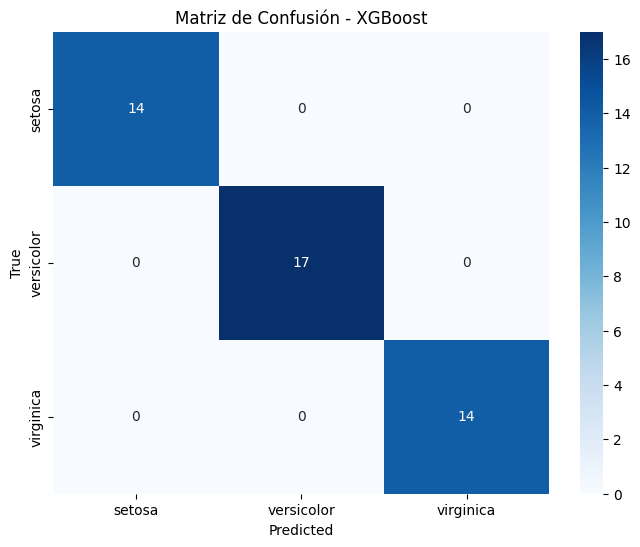

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear los conjuntos de datos DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#NOTA:
#DMatrix es una estructura de datos optimizada específicamente para el almacenamiento y manejo eficiente de grandes conjuntos de datos.
#Esto aporta mucho de las optimizaciones de memoria, datos faltantes y eficiencia computacional.

# Definir los parámetros del modelo XGBoost
params = {
    'objective': 'multi:softmax',  # Para clasificación multiclase
    'num_class': 3,  # Número de clases
    'max_depth': 3,
    'eta': 0.1,
    'seed': 10
}

# Entrenar el modelo XGBoost
num_rounds = 5
xgb_model = xgb.train(params, dtrain, num_rounds)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(dtest)

# Evaluar el desempeño
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Precisión del modelo XGBoost: {accuracy_xgb}")
print("\nReporte de clasificación para XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - XGBoost')
plt.show()


# Agregando SVMs

In [28]:
#importar bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [29]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [30]:
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Crear el clasificador SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:

# Predicciones
y_pred = svm.predict(X_test)

In [33]:
# Evaluación del modelo
print(classification_report(y_test, y_pred))
lineal_SVM_cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



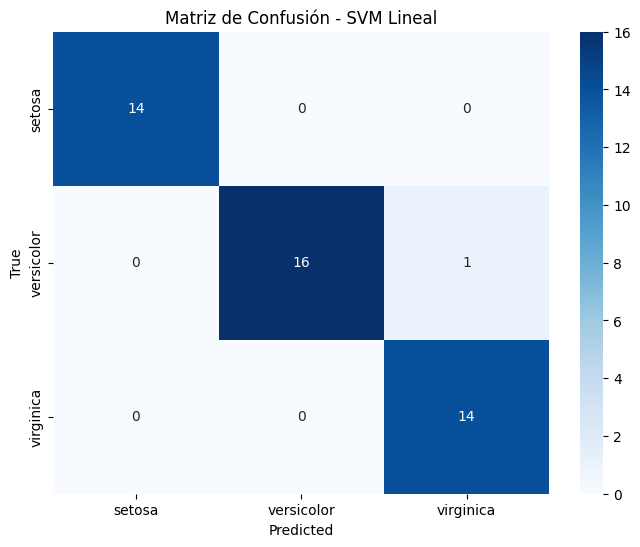

In [34]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(lineal_SVM_cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - SVM Lineal')
plt.show()

In [35]:
# Visualización

# Nota: No se puede visualizar directamente en 2D porque estamos usando todas las características
# Sin embargo, podemos usar PCA para reducir las dimensiones solo para visualización

from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reentrenar el modelo en el espacio reducido para visualización
svm_linear_pca = SVC(kernel='linear')
svm_linear_pca.fit(X_train_pca, y_train)


SVC(kernel='linear')

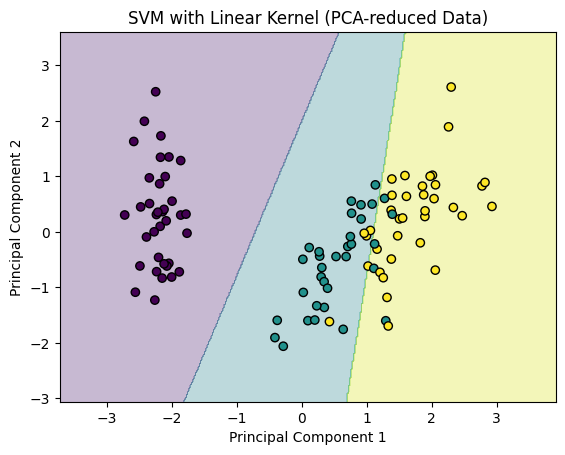

In [36]:
# Visualización
def plot_decision_boundaries(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #xx y yy son matrices creadas por np.meshgrid(), que contiene las coordenadas de todos los puntos en una cuadrícula bidimensional.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #ravel() convierte estas matrices en vectores unidimensionales (aplanados).
    #np.c_[] es una función que une estas dos matrices unidimensionales columna a columna, creando una matriz bidimensional con dos columnas. Esta matriz contiene todas las combinaciones de coordenadas (x, y) de la cuadrícula.
    Z = Z.reshape(xx.shape) # Ahora Z es una matriz 3x3
    #Z se convierte de un vector unidimensional de predicciones a una matriz bidimensional que tiene la misma forma que xx y yy.
    #Esto es necesario para que las predicciones puedan ser visualizadas correctamente en el gráfico.
    plt.contourf(xx, yy, Z, alpha=0.3)  #plt.contourf() crea un gráfico de contorno relleno.
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

plot_decision_boundaries(X_train_pca, y_train, svm_linear_pca, "SVM with Linear Kernel (PCA-reduced Data)")


Ahora con Kernel no lineal

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



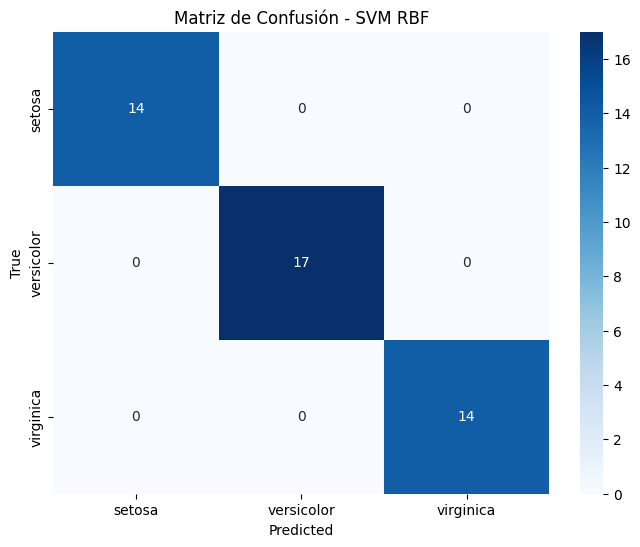

In [37]:
# Crear el clasificador SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', gamma='scale')  # 'scale' escala automáticamente la matriz de datos
svm_rbf.fit(X_train, y_train)

# Predicciones
y_pred = svm_rbf.predict(X_test)

# Evaluación del modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
rbf_SVM_cm =  confusion_matrix(y_test, y_pred)

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(rbf_SVM_cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - SVM RBF')
plt.show()

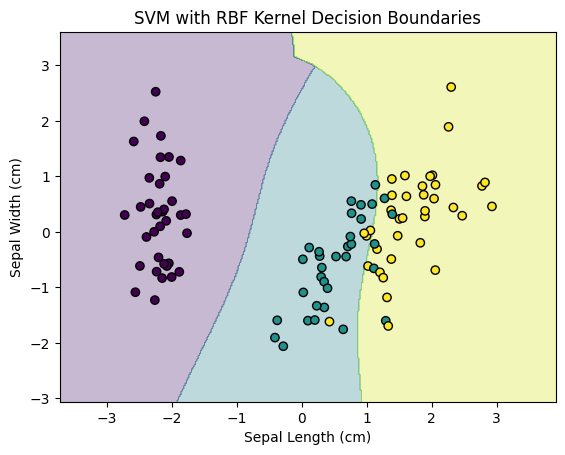

In [38]:
# Visualización
def plot_decision_boundaries(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.show()

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reentrenar el modelo en el espacio reducido para visualización
svm_rbf_pca = SVC(kernel='rbf', gamma='scale')
svm_rbf_pca.fit(X_train_pca, y_train)

# Visualización
plot_decision_boundaries(X_train_pca, y_train, svm_rbf_pca, "SVM with RBF Kernel Decision Boundaries")


Ahora un kernel polinómico

In [41]:
# Cargar el conjunto de datos de Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear el clasificador SVM con kernel polinómico
svm_poly_original = SVC(kernel='poly', degree=4)
svm_poly_original.fit(X_train, y_train)

# Predecir utilizando el conjunto de prueba original
y_pred_original = svm_poly_original.predict(X_test)

# Evaluación del modelo
print("Classification Report (Original): \n", classification_report(y_test, y_pred_original))

poly_SVM_cm =  confusion_matrix(y_test, y_pred_original)

Classification Report (Original): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



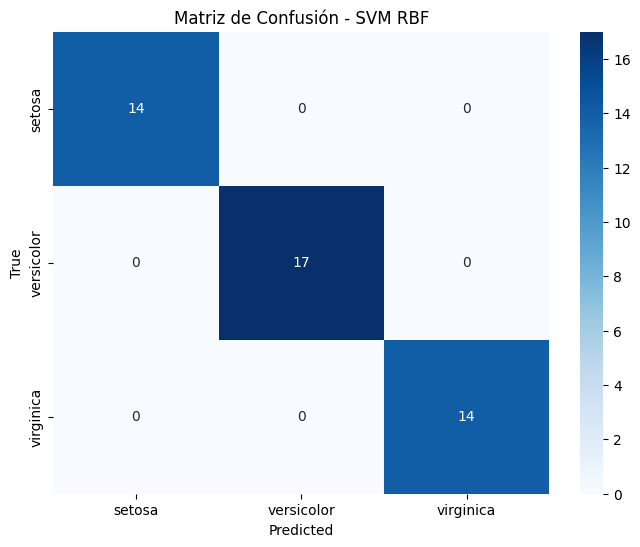

In [42]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(poly_SVM_cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - SVM RBF')
plt.show()

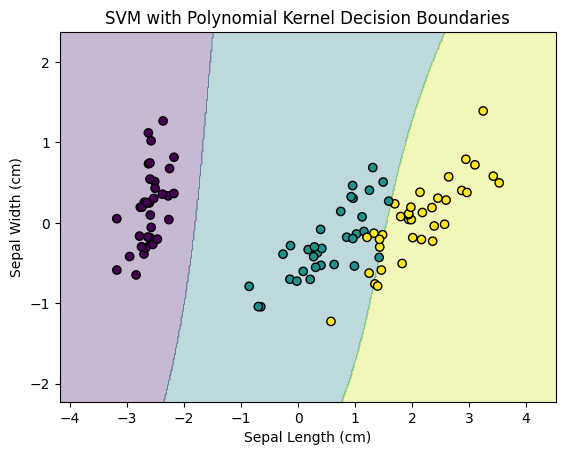

In [46]:
# Visualización
def plot_decision_boundaries(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(title)
    plt.show()

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reentrenar el modelo en el espacio reducido para visualización
svm_rbf_pca = SVC(kernel='poly', degree=3)
svm_rbf_pca.fit(X_train_pca, y_train)

# Visualización
plot_decision_boundaries(X_train_pca, y_train, svm_rbf_pca, "SVM with Polynomial Kernel Decision Boundaries")

In [47]:
#para visualizar en 3D usar 3 features.
# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data[:, :3]  # Usamos solo tres características para la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear el clasificador SVM con kernel polinómico
svm_poly_original = SVC(kernel='poly', degree=3)
svm_poly_original.fit(X_train, y_train)

# Predecir utilizando el conjunto de prueba original
y_pred_original = svm_poly_original.predict(X_test)

# Evaluación del modelo
print("Classification Report (Original): \n", classification_report(y_test, y_pred_original))

poly_SVM_cm =  confusion_matrix(y_test, y_pred_original)

Classification Report (Original): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.94      0.91        17
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



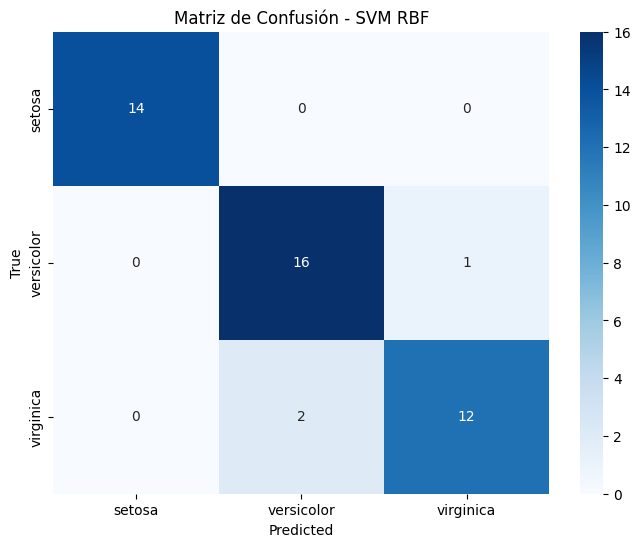

In [48]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(poly_SVM_cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - SVM RBF')
plt.show()

Estas visualizaciones son producidas con ChatGPT, despues de mucho interactuar para corregir errores.

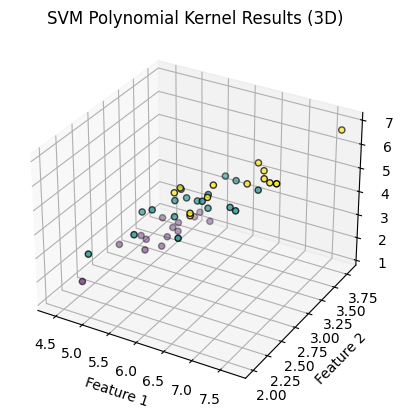

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para visualizar en 3D
def plot_3d_results(X, y, model, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear una gráfica de dispersión en 3D
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=model.predict(X), cmap='viridis', edgecolors='k', marker='o')

    # Etiquetas y título
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)

    plt.show()

# Visualizar en 3D los resultados de la predicción
plot_3d_results(X_test, y_test, svm_poly_original, "SVM Polynomial Kernel Results (3D)")



Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-50-d3394912040a>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict([[xx[i, j], yy[i, j], (z_max + z_min) / 2]])
<ipython-input-50-d3394912040a>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict([[xx[i, j], yy[i, j], (z_max + z_min) / 2]])
<ipython-input-50-d3394912040a>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predi

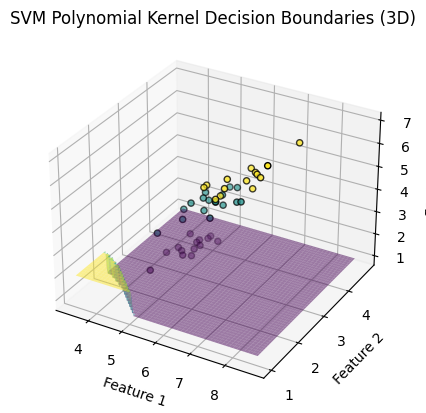

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data[:, :3]  # Usamos solo tres características para la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear el clasificador SVM con kernel polinómico
svm_poly_original = SVC(kernel='poly', degree=3)
svm_poly_original.fit(X_train, y_train)

# Función para visualizar las fronteras de clasificación en 3D
def plot_3d_decision_boundaries(X, y, model, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear una gráfica de dispersión en 3D para los puntos de datos
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k', marker='o')

    # Definir los límites de los ejes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Crear una cuadrícula 3D para visualizar las fronteras de clasificación
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = np.zeros_like(xx)

    for i in range(len(xx)):
        for j in range(len(yy)):
            zz[i, j] = model.predict([[xx[i, j], yy[i, j], (z_max + z_min) / 2]])

    # Visualizar las fronteras de clasificación en 3D
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')

    # Etiquetas y título
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)

    plt.show()

# Visualizar las fronteras de clasificación en 3D
plot_3d_decision_boundaries(X_test, y_test, svm_poly_original, "SVM Polynomial Kernel Decision Boundaries (3D)")


In [ ]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data[:, :3]  # Usamos solo tres características para la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear el clasificador SVM con kernel polinómico
svm_poly_original = SVC(kernel='poly', degree=3)
svm_poly_original.fit(X_train, y_train)

# Función para visualizar las fronteras de clasificación en 3D
def plot_3d_decision_boundaries(X, y, model, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear una gráfica de dispersión en 3D para los puntos de datos
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k', marker='o')

    # Definir los límites de los ejes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Crear una cuadrícula 3D para visualizar las fronteras de clasificación
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = np.zeros_like(xx)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            zz[i, j] = model.predict([[xx[i, j], yy[i, j], (z_max + z_min) / 2]])[0]

    # Visualizar las fronteras de clasificación en 3D
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')

    # Etiquetas y título
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)

    plt.show()

# Función para interactuar y rotar el gráfico
def interact_plot_3d():
    @interact(angle=(0, 360, 10))
    def plot(angle):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(30, angle)
        plot_3d_decision_boundaries(X_test, y_test, svm_poly_original, "SVM Polynomial Kernel Decision Boundaries (3D)")

# Interactuar y rotar el gráfico
interact_plot_3d()




interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

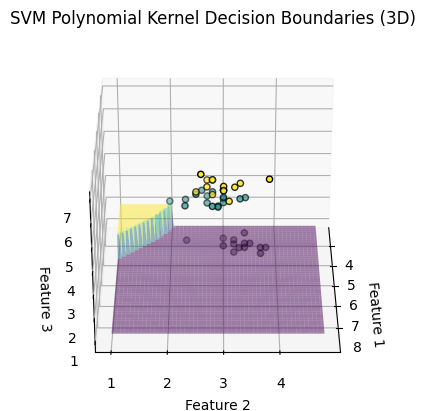

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data[:, :3]  # Usamos solo tres características para la visualización
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear el clasificador SVM con kernel polinómico
svm_poly_original = SVC(kernel='poly', degree=3)
svm_poly_original.fit(X_train, y_train)

# Función para visualizar las fronteras de clasificación en 3D
def plot_3d_decision_boundaries(X, y, model, title, angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear una gráfica de dispersión en 3D para los puntos de datos
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k', marker='o')

    # Definir los límites de los ejes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Crear una cuadrícula 3D para visualizar las fronteras de clasificación
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = np.zeros_like(xx)

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            zz[i, j] = model.predict([[xx[i, j], yy[i, j], (z_max + z_min) / 2]])[0]

    # Visualizar las fronteras de clasificación en 3D
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')

    # Etiquetas y título
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)

    # Establecer el ángulo de visualización
    ax.view_init(30, angle)

# Visualizar las fronteras de clasificación en 3D
plot_3d_decision_boundaries(X_test, y_test, svm_poly_original, "SVM Polynomial Kernel Decision Boundaries (3D)", 0)

plt.show()
